In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def visualize_dsda(
    route: list = [],
    feas_x: list = [],
    feas_y: list = [],
    objs: list = [],
    k: str = '?',
    ext1_name: str = 'External variable 1',
    ext2_name: str = 'External variable 2',
):
    X1, X2 = feas_x, feas_y
    cm = plt.colormaps.get_cmap('viridis_r')

    def drawArrow(A, B):
        plt.arrow(
            A[0],
            A[1],
            B[0] - A[0],
            B[1] - A[1],
            width=0.00005,
            head_width=0.15,
            head_length=0.08,
            color='black',
            shape='full',
        )

    for i in range(len(route) - 1):
        drawArrow(route[i], route[i + 1])

    sc = plt.scatter(X1, X2, s=80, c=objs, cmap=cm)
    cbar = plt.colorbar(sc)
    cbar.set_label('Objective function', rotation=90)
    title_string = 'D-SDA with k = ' + k
    plt.title(title_string)
    plt.xlabel(ext1_name)
    plt.ylabel(ext2_name)
    plt.show()

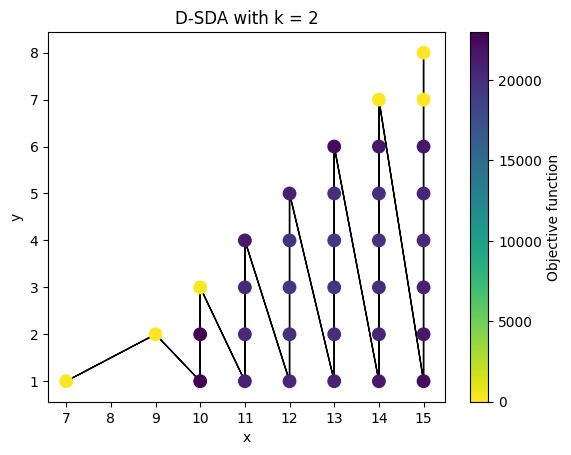

In [12]:
df = pd.read_csv('compl_enum_column_17_baron.csv')

# Filter only optimal points
optimal_df = df[df['Status'] == 'Optimal']

# Extract x, y coordinates and objective values
feas_x = optimal_df['x'].tolist()
feas_y = optimal_df['y'].tolist()
objs = optimal_df['Objective'].fillna(0).tolist()  # Replacing NaN with 0 for plotting purposes

# For the route, I am assuming you want to traverse optimal points in order they appear in the CSV
route = list(zip(feas_x, feas_y))

# Visualize using the provided function
visualize_dsda(route=route, feas_x=feas_x, feas_y=feas_y, objs=objs, k='2', ext1_name='x', ext2_name='y')